In [1]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

# Load the dataset
california = fetch_california_housing(as_frame=True)
df = california.frame

# Display basic statistics
print("Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nInfo:")
print(df.info())
print("\nDescribe:")
print(df.describe())


Shape: (20640, 9)

First 5 rows:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms   

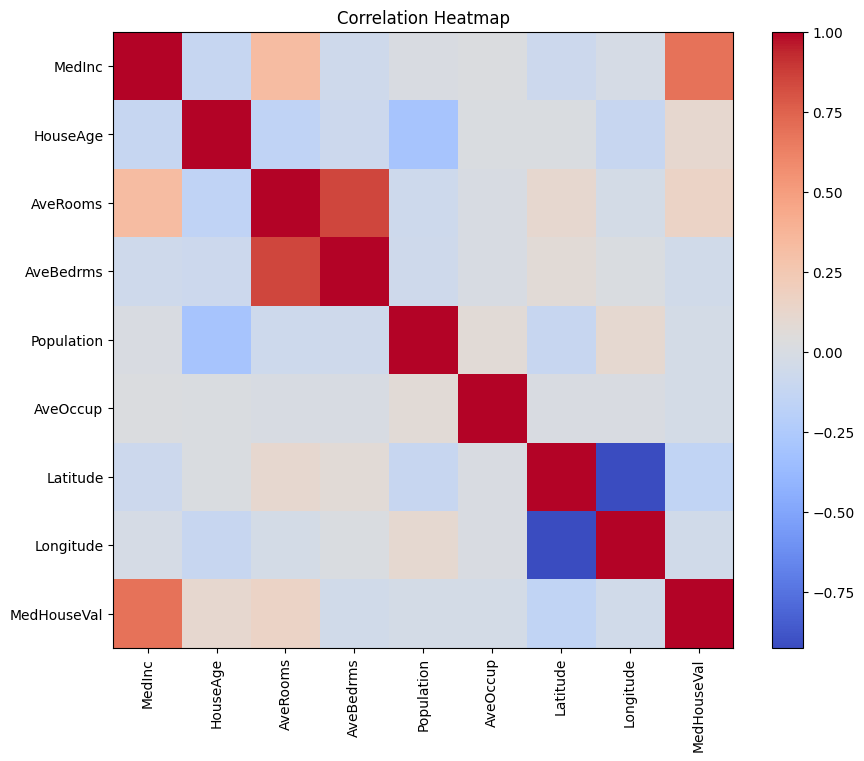

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
corr = df.corr()
plt.imshow(corr, cmap='coolwarm', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)
plt.title("Correlation Heatmap")
plt.show()


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train
lr = LinearRegression()
lr.fit(X_train, y_train)

# Coefficients
print("Coefficients:", lr.coef_)
print("Intercept:", lr.intercept_)

# Predictions and Metrics
y_pred = lr.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R² Score: {r2:.3f}")
print(f"MAE: {mae:.3f}")
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")


Coefficients: [ 4.48674910e-01  9.72425752e-03 -1.23323343e-01  7.83144907e-01
 -2.02962058e-06 -3.52631849e-03 -4.19792487e-01 -4.33708065e-01]
Intercept: -37.023277706064064
R² Score: 0.576
MAE: 0.533
MSE: 0.556
RMSE: 0.746


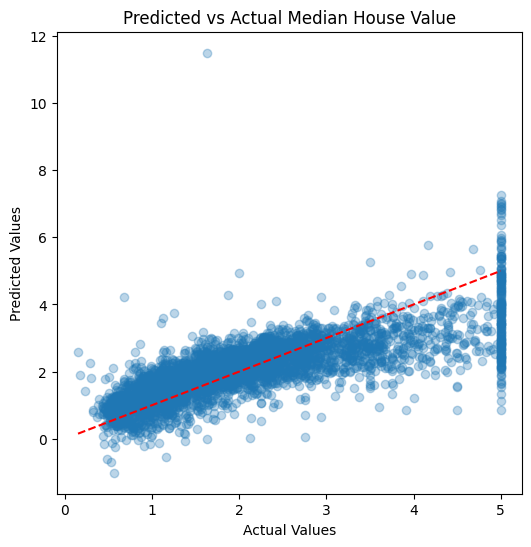

In [5]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Median House Value")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal
plt.show()


In [7]:
# Get top correlated features with target
corr_target = df.corr()['MedHouseVal'].abs().sort_values(ascending=False)
print(corr_target)

# Select top 3 features (excluding the target itself)
top_features = corr_target.index[1:4]
print("Top correlated features:", list(top_features))


MedHouseVal    1.000000
MedInc         0.688075
AveRooms       0.151948
Latitude       0.144160
HouseAge       0.105623
AveBedrms      0.046701
Longitude      0.045967
Population     0.024650
AveOccup       0.023737
Name: MedHouseVal, dtype: float64
Top correlated features: ['MedInc', 'AveRooms', 'Latitude']


In [8]:
from sklearn.preprocessing import StandardScaler

X_top = df[list(top_features)]

scaler = StandardScaler()
X_top_scaled = scaler.fit_transform(X_top)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_top_scaled, y, test_size=0.2, random_state=42)

# Train model
lr2 = LinearRegression()
lr2.fit(X_train, y_train)
y_pred2 = lr2.predict(X_test)

# Metrics
r2_2 = r2_score(y_test, y_pred2)
mae_2 = mean_absolute_error(y_test, y_pred2)
mse_2 = mean_squared_error(y_test, y_pred2)
rmse_2 = np.sqrt(mse_2)

print("\nAfter Feature Selection & Standardization:")
print(f"R² Score: {r2_2:.3f}")
print(f"MAE: {mae_2:.3f}")
print(f"MSE: {mse_2:.3f}")
print(f"RMSE: {rmse_2:.3f}")



After Feature Selection & Standardization:
R² Score: 0.470
MAE: 0.621
MSE: 0.694
RMSE: 0.833
